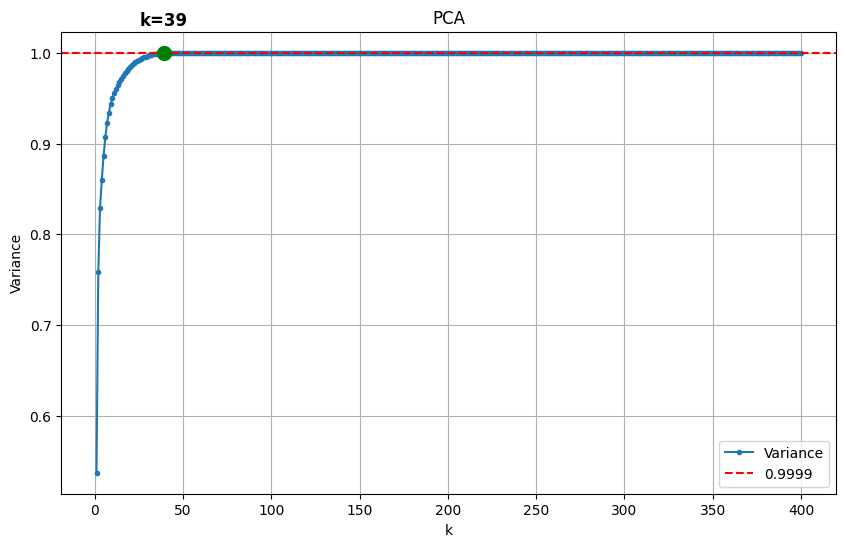

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


data = pd.read_csv('RB99_240m_2010.1.1_2025.1.31.csv_tz80_Train_8122.csv')  ### 训练集文件
data = data.drop('A0', axis=1)   ### 删除A0标签这列

# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)

num = 0.9999

pca = PCA()
pca.fit(data)    

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
k = np.argmax(cumulative_explained_variance >= num) + 1

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='.', label='Variance')
plt.axhline(y=num, color='r', linestyle='--', label=str(num))
plt.scatter(k, cumulative_explained_variance[k-1], color='g', s=100, zorder=5)
plt.annotate(f'k={k}', (k, cumulative_explained_variance[k-1]), 
             textcoords="offset points", xytext=(0, 20), ha='center', 
             fontsize=12, fontweight='bold', color='black')

plt.title('PCA')
plt.xlabel('k')
plt.ylabel('Variance')
plt.grid()
plt.legend()
plt.savefig("PCA.jpg")
plt.show()